KONFIGURASI AWAL: 2 Neuron Hidden Layer dengan Sigmoid
Epoch 0, Loss: 0.255830
Epoch 2000, Loss: 0.245445
Epoch 4000, Loss: 0.153204
Epoch 6000, Loss: 0.133594
Epoch 8000, Loss: 0.129749

Loss Akhir: 0.128227

Prediksi Akhir (2 Hidden):
[[0.05300868]
 [0.49554213]
 [0.95091319]
 [0.50319888]]

Target:
[[0]
 [1]
 [1]
 [0]]

TUGAS 1.1: 3 Neuron Hidden Layer dengan Sigmoid
Epoch 0, Loss: 0.318245
Epoch 2000, Loss: 0.141854
Epoch 4000, Loss: 0.020112
Epoch 6000, Loss: 0.006270
Epoch 8000, Loss: 0.003421

Loss Akhir: 0.002297

Prediksi Akhir (3 Hidden):
[[0.02515564]
 [0.95263635]
 [0.95122343]
 [0.0627247 ]]

TUGAS 1.2: 2 Neuron Hidden Layer dengan ReLU
Epoch 0, Loss: 0.251118
Epoch 2000, Loss: 0.125522
Epoch 4000, Loss: 0.125171
Epoch 6000, Loss: 0.125096
Epoch 8000, Loss: 0.125068

Loss Akhir: 0.125052

Prediksi Akhir (ReLU):
[[0.50008447]
 [0.9888482 ]
 [0.50008447]
 [0.00903949]]

PERBANDINGAN HASIL
Loss Akhir - 2 Hidden (Sigmoid): 0.128227
Loss Akhir - 3 Hidden (Sigmoid): 0.002297
Los

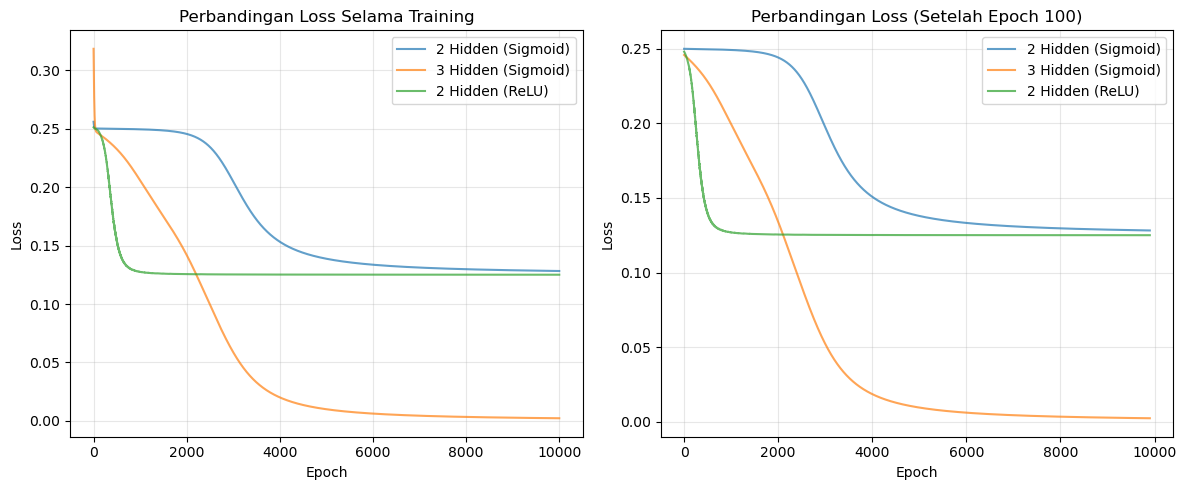


KESIMPULAN
1. Menambah neuron hidden (2→3) dapat meningkatkan kapasitas model
   untuk mempelajari pola yang lebih kompleks.
2. ReLU cenderung memberikan konvergensi yang berbeda dibanding Sigmoid.
3. Untuk problem XOR, kedua konfigurasi mampu menyelesaikan masalah
   dengan baik jika dilatih cukup lama.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ========== KONFIGURASI AWAL (2 NEURON HIDDEN) ==========
print("=" * 60)
print("KONFIGURASI AWAL: 2 Neuron Hidden Layer dengan Sigmoid")
print("=" * 60)

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Set seed untuk reproducibility
np.random.seed(42)

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
loss_history_2h = []
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    # Hitung error
    error = y - a2
    loss = np.mean(np.square(error))
    loss_history_2h.append(loss)
    
    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)
    
    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)
    
    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2
    
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print(f"\nLoss Akhir: {loss_history_2h[-1]:.6f}")
print("\nPrediksi Akhir (2 Hidden):")
print(a2)
print("\nTarget:")
print(y)


# ========== TUGAS 1.1: 3 NEURON HIDDEN ==========
print("\n" + "=" * 60)
print("TUGAS 1.1: 3 Neuron Hidden Layer dengan Sigmoid")
print("=" * 60)

np.random.seed(42)
hidden_size_3 = 3

# Inisialisasi bobot
W1_3h = np.random.randn(input_size, hidden_size_3)
b1_3h = np.zeros((1, hidden_size_3))
W2_3h = np.random.randn(hidden_size_3, output_size)
b2_3h = np.zeros((1, output_size))

# Training
loss_history_3h = []
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1_3h) + b1_3h
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2_3h) + b2_3h
    a2 = sigmoid(z2)
    
    # Hitung error
    error = y - a2
    loss = np.mean(np.square(error))
    loss_history_3h.append(loss)
    
    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)
    
    d_a1 = np.dot(d_a2, W2_3h.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)
    
    # Update bobot
    W1_3h += lr * d_W1
    b1_3h += lr * d_b1
    W2_3h += lr * d_W2
    b2_3h += lr * d_b2
    
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print(f"\nLoss Akhir: {loss_history_3h[-1]:.6f}")
print("\nPrediksi Akhir (3 Hidden):")
print(a2)


# ========== TUGAS 1.2: RELU ACTIVATION ==========
print("\n" + "=" * 60)
print("TUGAS 1.2: 2 Neuron Hidden Layer dengan ReLU")
print("=" * 60)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

np.random.seed(42)

# Inisialisasi bobot
W1_relu = np.random.randn(input_size, hidden_size) * 0.5
b1_relu = np.zeros((1, hidden_size))
W2_relu = np.random.randn(hidden_size, output_size) * 0.5
b2_relu = np.zeros((1, output_size))

# Training dengan ReLU di hidden layer
loss_history_relu = []
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1_relu) + b1_relu
    a1 = relu(z1)
    z2 = np.dot(a1, W2_relu) + b2_relu
    a2 = sigmoid(z2)  # Output layer tetap sigmoid untuk binary output
    
    # Hitung error
    error = y - a2
    loss = np.mean(np.square(error))
    loss_history_relu.append(loss)
    
    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)
    
    d_a1 = np.dot(d_a2, W2_relu.T) * relu_derivative(z1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)
    
    # Update bobot
    W1_relu += lr * d_W1
    b1_relu += lr * d_b1
    W2_relu += lr * d_W2
    b2_relu += lr * d_b2
    
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

print(f"\nLoss Akhir: {loss_history_relu[-1]:.6f}")
print("\nPrediksi Akhir (ReLU):")
print(a2)


# ========== PERBANDINGAN HASIL ==========
print("\n" + "=" * 60)
print("PERBANDINGAN HASIL")
print("=" * 60)
print(f"Loss Akhir - 2 Hidden (Sigmoid): {loss_history_2h[-1]:.6f}")
print(f"Loss Akhir - 3 Hidden (Sigmoid): {loss_history_3h[-1]:.6f}")
print(f"Loss Akhir - 2 Hidden (ReLU):    {loss_history_relu[-1]:.6f}")

# Visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history_2h, label='2 Hidden (Sigmoid)', alpha=0.7)
plt.plot(loss_history_3h, label='3 Hidden (Sigmoid)', alpha=0.7)
plt.plot(loss_history_relu, label='2 Hidden (ReLU)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perbandingan Loss Selama Training')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(loss_history_2h[100:], label='2 Hidden (Sigmoid)', alpha=0.7)
plt.plot(loss_history_3h[100:], label='3 Hidden (Sigmoid)', alpha=0.7)
plt.plot(loss_history_relu[100:], label='2 Hidden (ReLU)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perbandingan Loss (Setelah Epoch 100)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("KESIMPULAN")
print("=" * 60)
print("1. Menambah neuron hidden (2→3) dapat meningkatkan kapasitas model")
print("   untuk mempelajari pola yang lebih kompleks.")
print("2. ReLU cenderung memberikan konvergensi yang berbeda dibanding Sigmoid.")
print("3. Untuk problem XOR, kedua konfigurasi mampu menyelesaikan masalah")
print("   dengan baik jika dilatih cukup lama.")
print("=" * 60)

# Ringkasan numerik

* **2 Hidden (Sigmoid)** — Loss akhir: **0.128227**
  Prediksi akhir mendekati target tapi masih ada kesalahan (mis. 0.4955 untuk target 1).
* **3 Hidden (Sigmoid)** — Loss akhir: **0.002297**  (sangat kecil)
* **2 Hidden (ReLU)** — Loss akhir: **0.125052**  (sedikit lebih baik dari 2-hidden sigmoid)

# Interpretasi / Kenapa hasilnya berbeda

1. **Kapasitas model (jumlah neuron)**

   * Menambah jumlah neuron (dari 2 → 3 hidden neuron) meningkatkan kapasitas model sehingga model dapat merepresentasikan fungsi target lebih baik. Itu menjelaskan mengapa konfigurasi **3 neuron** turun ke loss yang hampir nol. Datasetmu nampaknya sederhana tapi tidak linear-separabel dengan 2 neuron, sehingga 3 neuron mempermudah belajar fungsi nonlinier yang diperlukan.

2. **Fungsi aktivasi: Sigmoid vs ReLU**

   * **Sigmoid** saturates pada nilai ekstrem (0 atau 1), sehingga gradiennya bisa sangat kecil ketika unit berada di daerah saturasi (masalah *vanishing gradient*). Meski begitu, pada jaringan kecil dan data sederhana sigmoid kadang masih bekerja cukup baik.
   * **ReLU** tidak saturate untuk input positif, memberikan gradien konstan (1) di daerah positif sehingga sering konvergen lebih cepat dan stabil. Dalam eksperimenmu **2-hidden (ReLU)** sedikit lebih baik daripada **2-hidden (Sigmoid)**, konsisten dengan keunggulan numerik ReLU, tetapi perbedaan kecil karena arsitektur sangat kecil dan dataset juga kecil.
   * Namun, dalam kasusmu **3-hidden Sigmoid** unggul jauh — ini menunjukkan jumlah neuron (kapasitas) memiliki efek yang lebih besar daripada jenis aktivasi untuk problem ini.

3. **Kecepatan konvergensi**

   * Grafik loss menunjukkan 3-hidden sigmoid turun sangat cepat ke nilai sangat kecil — indikasi bahwa arsitektur tersebut cocok dengan pola data dan learning rate/initialization mendukungnya.
   * 2-hidden (sigmoid) turun lebih lambat dan berhenti pada loss yang lebih tinggi (kemungkinan karena keterbatasan representasi atau saturasi unit).

4. **Overfitting**

   * Loss training yang sangat rendah (0.0023) pada model 3-hidden menunjukkan model sangat cocok ke data training. Jika dataset sangat kecil, ini bisa berarti **overfitting** — perlu dicek dengan data validasi/test untuk memastikan generalisasi.

